# Step 1: Setup & Data Loading

In [1]:
# ─── 1. INSTALL & IMPORT ────────────────────────────────
# Install seaborn for extra plotting (only if needed)
!pip install -q numpy pandas matplotlib scikit-learn seaborn

In [2]:
# Standard data libraries
import pandas as pd
import numpy as np

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# TODO: Run this cell to load all the libraries

In [3]:
# ─── 1. LOAD THE DATA ───────────────────────────────────
# URL of the Adult Income CSV (hosted on GitHub)
url = "https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/refs/heads/master/adult.csv"

# Read into a DataFrame
df = pd.read_csv(url)
# df = pd.read_csv("data/processed.csv")


df['income_higher_than_50k'] = df['income'].map({'<=50K':0, '>50K':1})
df = df.replace('?', np.nan) # This dataset uses '?' as a placeholder for missing data, let's use the best practices with np.nan

# TODO: Inspect the first rows to see columns and values
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_higher_than_50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0


# Step 2: Exploratory Data Analysis (EDA)

In [4]:
# ─── 2.1 CHECK SHAPE & TYPES ─────────────────────────────
print("Records, Features:", df.shape)
df.info()
# TODO: Note which columns are numeric vs object (categorical)

Records, Features: (48842, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     48842 non-null  int64 
 1   workclass               46043 non-null  object
 2   fnlwgt                  48842 non-null  int64 
 3   education               48842 non-null  object
 4   educational-num         48842 non-null  int64 
 5   marital-status          48842 non-null  object
 6   occupation              46033 non-null  object
 7   relationship            48842 non-null  object
 8   race                    48842 non-null  object
 9   gender                  48842 non-null  object
 10  capital-gain            48842 non-null  int64 
 11  capital-loss            48842 non-null  int64 
 12  hours-per-week          48842 non-null  int64 
 13  native-country          47985 non-null  object
 14  income                 

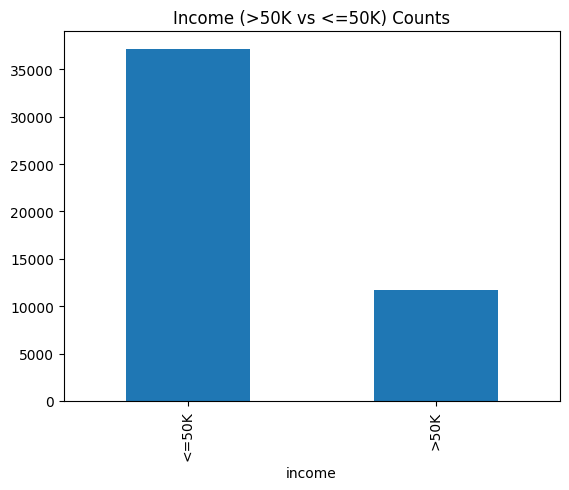

In [5]:
# ─── 2.2 TARGET DISTRIBUTION ────────────────────────────
df['income'].value_counts().plot(
    kind='bar', title='Income (>50K vs <=50K) Counts'
)
plt.show()
# TODO: What % earn >50K?

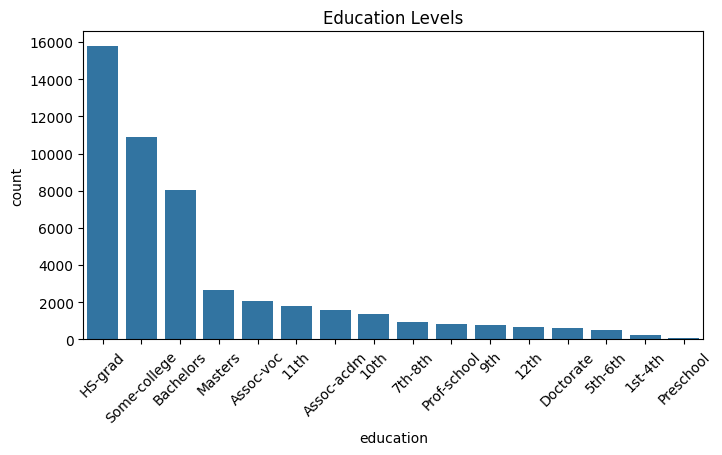

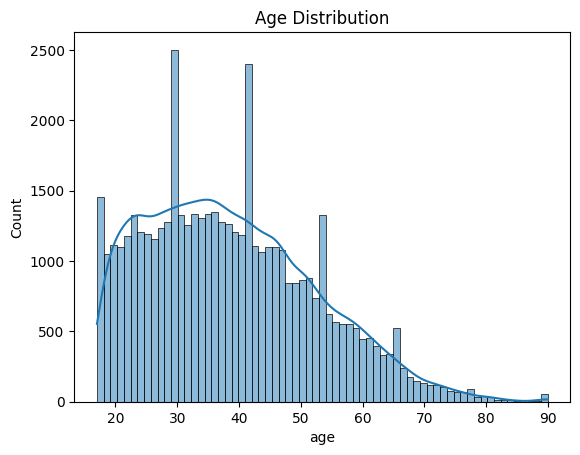

In [6]:
# ─── 2.3 FEATURE VISUALIZATIONS ─────────────────────────
# Categorical: education
plt.figure(figsize=(8,4))
sns.countplot(x='education', data=df,
              order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Levels")
plt.show()

# Numeric: age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# TODO: Which features look most imbalanced?

#### Correlation Matrix of Numeric Features

We often start by looking at how numeric features correlate with each other **and** with our target (`income`).  
High positive or negative correlations can hint at strong predictors or multicollinearity issues.


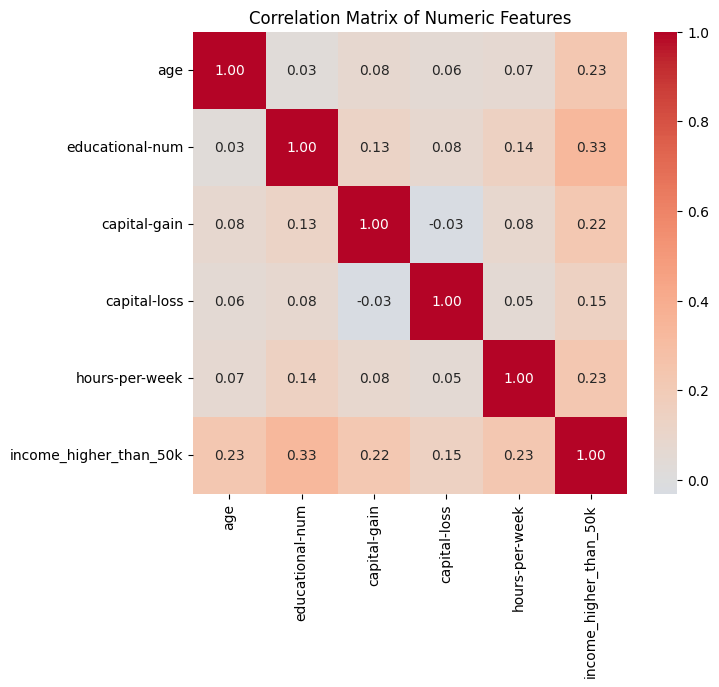

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns + our binary target
numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
corr_df = df[numeric_cols + ['income_higher_than_50k']].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## TODO should we remove this???
#### Boxplots for Capital Gain & Hours per Week

Boxplots give a concise summary of distribution (median, quartiles, outliers).  
- **Capital Gain:** Are high-income individuals earning dramatically more in capital gains?  
- **Hours/Week:** Do high earners work more hours on average?


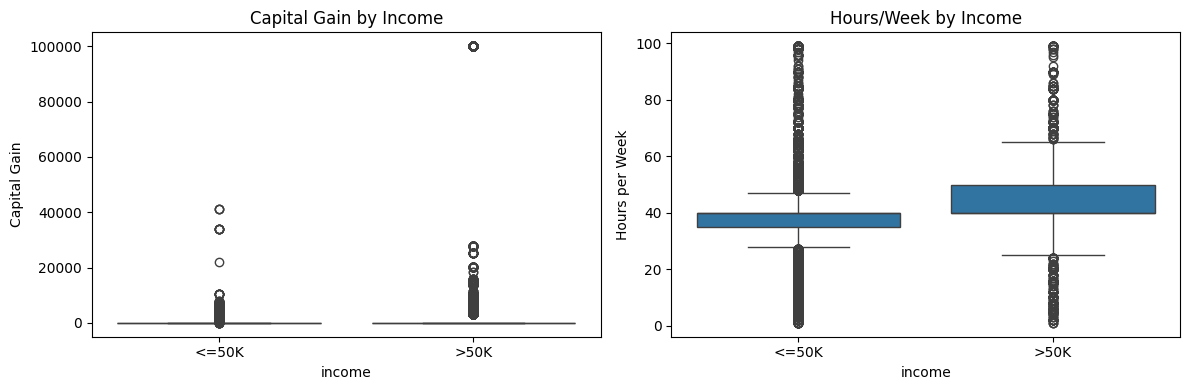

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x='income', y='capital-gain', data=df, ax=axes[0])
axes[0].set_title("Capital Gain by Income")
axes[0].set_ylabel("Capital Gain")

sns.boxplot(x='income', y='hours-per-week', data=df, ax=axes[1])
axes[1].set_title("Hours/Week by Income")
axes[1].set_ylabel("Hours per Week")

plt.tight_layout()
plt.show()
# TODO @jidarwish should we keep this?

#### Income Proportions by Education Level

For a categorical feature, a **stacked bar chart** shows the proportion of each income class within each category.  
This reveals which education levels have higher fractions of >50K earners.


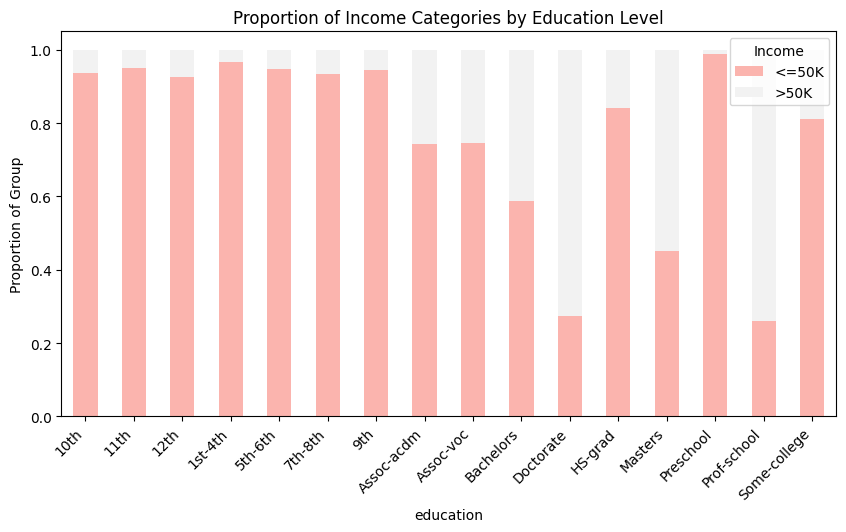

In [9]:
edu_prop = pd.crosstab(df['education'], df['income'], normalize='index')

edu_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    colormap='Pastel1'
)
plt.title("Proportion of Income Categories by Education Level")
plt.ylabel("Proportion of Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.show()


## TODO: Should we remove this?
#### Age vs Hours-per-Week

A scatterplot of **age** against **hours-per-week**, colored by income, can show whether high earners cluster in certain age or work-hour ranges.


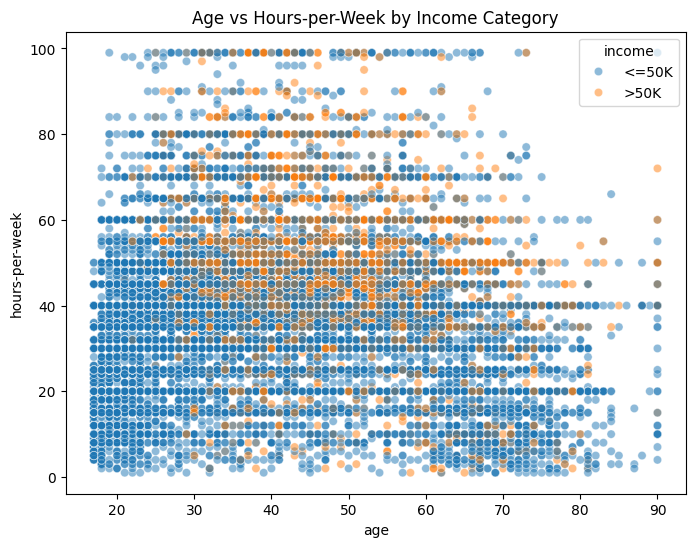

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='age', y='hours-per-week',
    hue='income', data=df, alpha=0.5
)
plt.title("Age vs Hours-per-Week by Income Category")
plt.show()


#### Marital Status Distribution among >50K Earners

Pie charts can quickly show which marital statuses are most common among high earners.


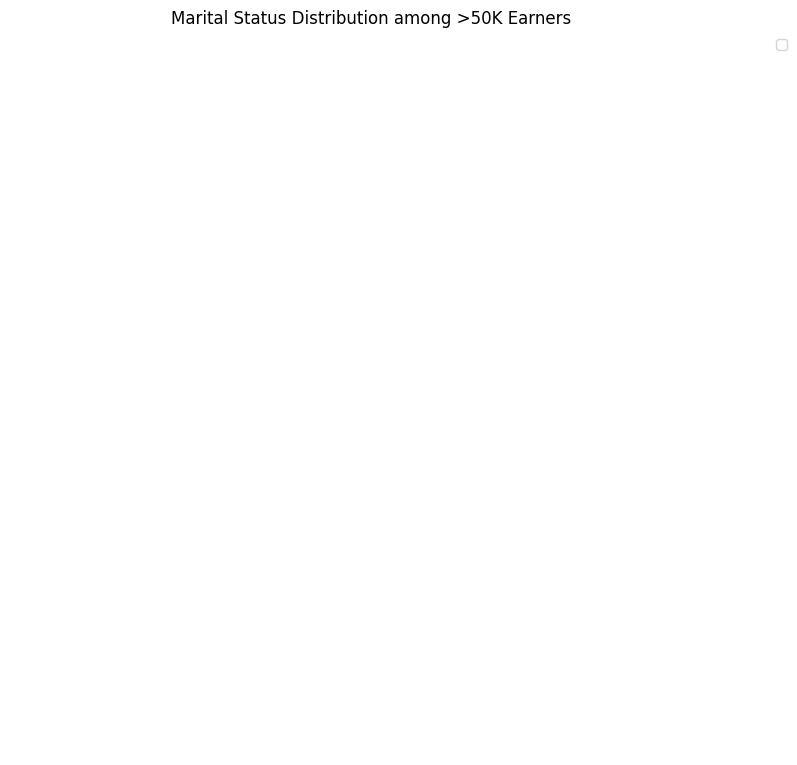

In [11]:
high_status = df[df['income']==1]['marital-status'].value_counts()

plt.figure(figsize=(8, 8))
high_status.plot(
    kind='pie',
    startangle=90,
    colormap='tab20',
    labels=None  # Hide labels on pie
)
plt.legend(labels=high_status.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("")
plt.title("Marital Status Distribution among >50K Earners")
plt.tight_layout()
plt.show()

#### Top 10 Occupations for >50K Earners

A horizontal bar chart of the most frequent occupations among high earners can highlight which roles are most associated with higher income.


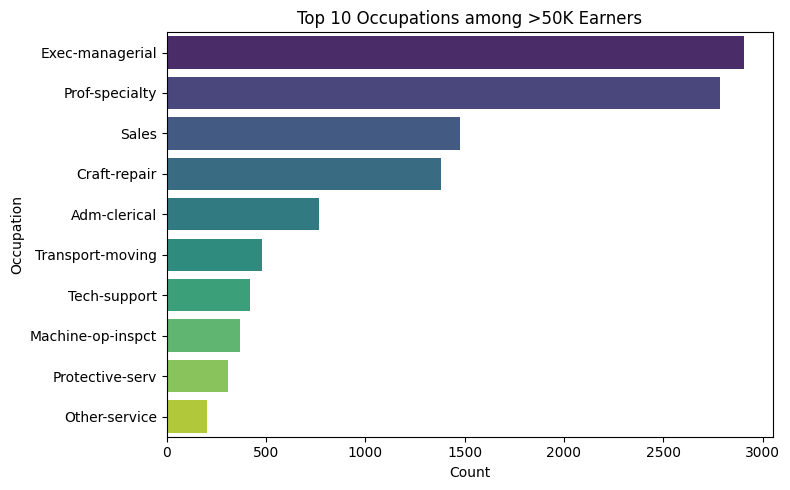

In [12]:
# Prepare data
top_occ = df[df['income'] == '>50K']['occupation'].value_counts().nlargest(10)
top_occ_df = top_occ.reset_index()
top_occ_df.columns = ['occupation', 'count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_occ_df,
    y='occupation',
    x='count',
    hue='occupation',      # required to use palette safely
    palette='viridis'
)
plt.title("Top 10 Occupations among >50K Earners")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

### Why use?

- Correlation heatmap highlights which features move together—and how strongly they relate to the target.
- Boxplots and scatterplots help spot outliers and distribution differences between income groups.
- Stacked bars show category-level propensities.
- Pie and occupation charts give intuitive views of group makeup.

# Step 3: Data Preprocessing

In [13]:
# ─── 3.1 HANDLE MISSING VALUES ───────────────────────────
print((df.isna()).sum()) # Check how many and what values are missing
old_size = len(df)
print() # For spacing
print(f'Size of dataset = {len(df)}')
df = df.dropna()         # simple drop for workshop since missing data is not too big
# TODO: How many rows were removed?
print(f'Size of dataset after removing missing values {len(df)}')

age                          0
workclass                 2799
fnlwgt                       0
education                    0
educational-num              0
marital-status               0
occupation                2809
relationship                 0
race                         0
gender                       0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country             857
income                       0
income_higher_than_50k       0
dtype: int64

Size of dataset = 48842
Size of dataset after removing missing values 45222


In [14]:
# ─── 3.2 ENCODE CATEGORICALS ────────────────────────────
# We use one-hot encoding instead of numeric labels because decision trees split data based on feature values. 
# If we assign numbers like `Private = 1`, `State-gov = 2`, it introduces a fake order (e.g., 2 > 1), which misleads the model.
# This is called One-hot encoding and it avoids this by creating separate 0/1 columns for each category, 
# letting the tree split cleanly on exact matches without assuming any order.
# It's more accurate and reliable for decision trees.

cat_cols = df.select_dtypes('object').columns.drop('income')
df_enc = pd.get_dummies(df, columns=cat_cols)
# TODO: Inspect df_enc.columns to see new dummy columns
# TODO talk about this in terms of decision trees why this would be nice!
df_enc.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'income_higher_than_50k',
       'workclass_Federal-gov', 'workclass_Local-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=106)

In [15]:
df_enc.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,income_higher_than_50k,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,<=50K,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,>50K,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,>50K,1,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,0,0,30,<=50K,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
# ─── 3.3 BINARY TARGET & SCALING ────────────────────────
# Convert target to 0/1
# df_enc['income'] = df['income'].map({'<=50K':0, '>50K':1})

# Scale numeric features
from sklearn.preprocessing import StandardScaler
num_cols = ['age','fnlwgt','educational-num',
            'capital-gain','capital-loss','hours-per-week']
scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

In [17]:
# ─── 3.4 TRAIN/TEST SPLIT ────────────────────────────────
X_labels = df_enc.drop('income', axis=1)
X = X_labels.drop('income_higher_than_50k', axis=1)
y = df_enc['income_higher_than_50k']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y
# TODO: What are the shapes of X_train and X_test?

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income_higher_than_50k, Length: 45222, dtype: int64

# Step 4: Model Training & Evaluation

In [18]:
# ─── 4.1 TRAIN MODEL ─────────────────────────────────────
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# TODO: This may take ~30 seconds – watch for convergence warnings.

LogisticRegression(max_iter=1000)

In [19]:
# ─── 4.2 PREDICT & ACCURACY ──────────────────────────────
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.85


In [20]:
# ─── 4.3 DETAILED METRICS ───────────────────────────────
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.60      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.85      0.85      0.85      9045



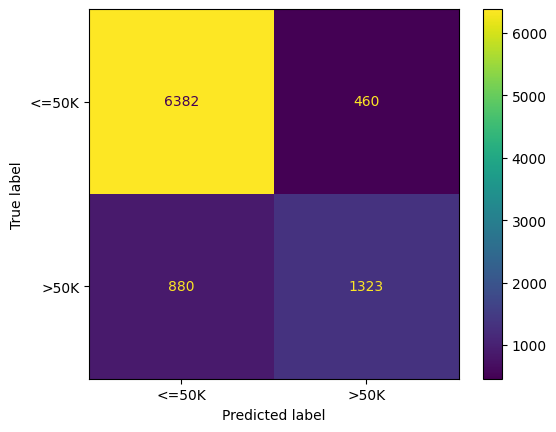

In [21]:
# ─── 4.4 CONFUSION MATRIX ───────────────────────────────
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['<=50K','>50K'])
disp.plot()
plt.show()
# TODO: Identify TP, FP, FN, TN cells

# Step 5: Fairness Check

In [22]:
# # ─── 5.1 EXTRACT GENDER INFO ─────────────────────────────
# # We need the original 'sex' column before one-hot:
# sex = df['gender']
# # .reset_index(drop=True)
# test_sex = sex[X_test.index]
# # TODO: Ensure test_sex aligns with X_test indices

In [23]:
# # ─── 5.2 GROUP METRICS ─────────────────────────────────── #TODO HOW DOES THIS WORK
# mask_m = (test_sex == 'Male')
# mask_f = (test_sex == 'Female')

# from sklearn.metrics import accuracy_score
# acc_m = accuracy_score(y_test[mask_m], y_pred[mask_m])
# acc_f = accuracy_score(y_test[mask_f], y_pred[mask_f])

# print(f"Male accuracy:   {acc_m:.3f}")
# print(f"Female accuracy: {acc_f:.3f}")
# # TODO: Discuss why these may differ

## Is our data representative?

In this section we will check whether our data is representative according to 2 so called `sensitive attributes`: gender and race.

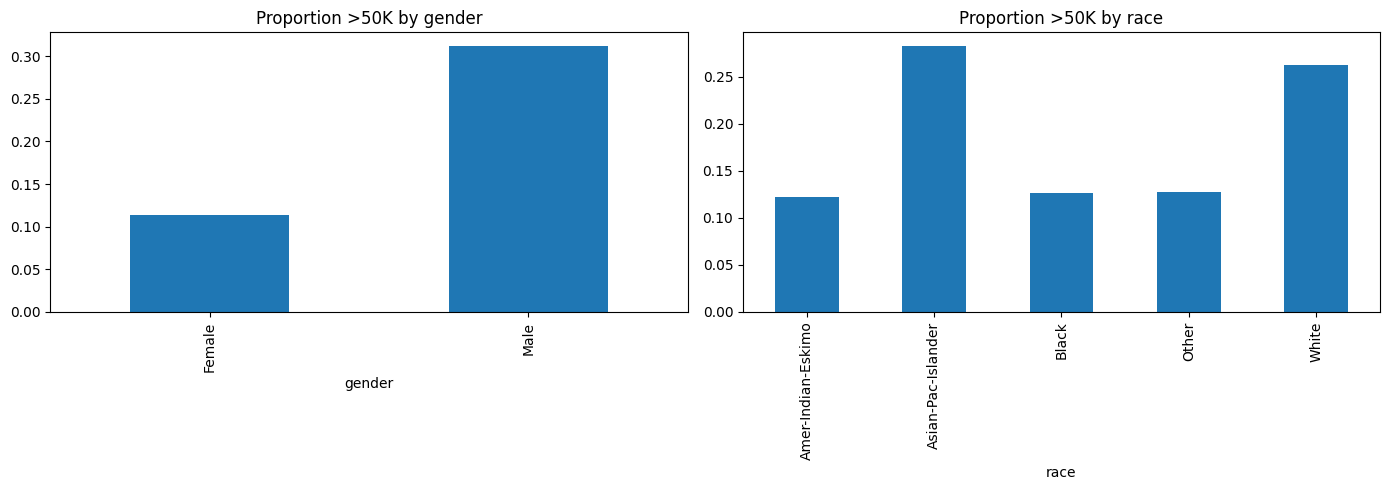

In [24]:
# ─── Define a reusable plotting function ────────────────────────────────
import matplotlib.pyplot as plt

def plot_percentage_by_group(ax, df, col_name, x_label=None, y_label=None):
    """
    Plots the percentage of people with income >50K for each category in `col_name`.
    
    ax        : a matplotlib Axes object
    df        : DataFrame containing 'incomeHigherThan50k' and col_name
    col_name  : the column to group by (e.g. 'sex' or 'race')
    x_label   : optional label for x-axis
    y_label   : optional label for y-axis
    """
    # Total count per group
    group_sizes = df.groupby(col_name).size()
    # Count of >50K per group
    higher_income = df[df['income_higher_than_50k'] == 1].groupby(col_name).size()
    # Compute proportions (fill missing groups with 0)
    percentages = (higher_income / group_sizes).fillna(0)
    
    # Plot as bar chart
    percentages.plot(
        kind='bar',
        ax=ax,
        title=f'Proportion >50K by {col_name}'
    )
    
# ─── Create side-by-side plots for Gender & Race ─────────────────────────
fig, axes = plt.subplots(ncols=2, figsize=(14,5))

plot_percentage_by_group(
    axes[0], df, 'gender',
    x_label='Gender', y_label='Proportion >50K'
)
plot_percentage_by_group(
    axes[1], df, 'race',
    x_label='Race', y_label='Proportion >50K'
)
plt.tight_layout()
plt.show()


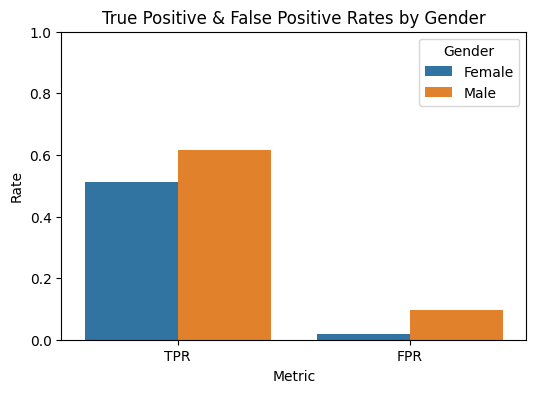

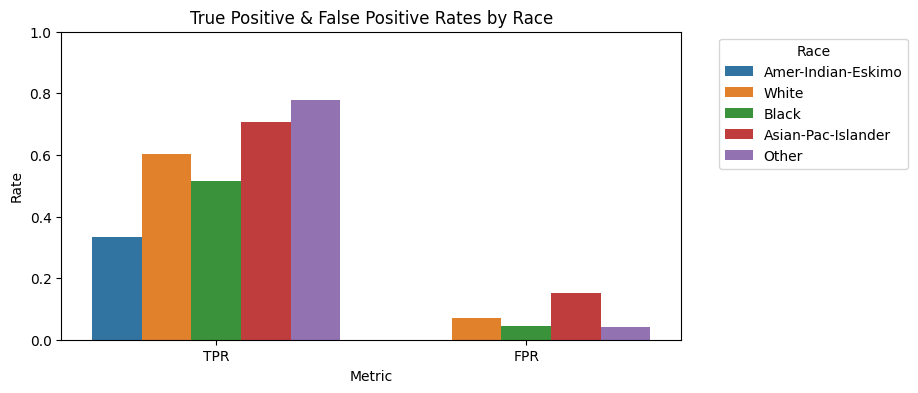

In [25]:
def compute_group_rates(y_true, y_pred, groups):
    records = []
    for g in groups.unique():
        mask = (groups == g)
        tn, fp, fn, tp = confusion_matrix(
            y_true[mask], y_pred[mask], labels=[0,1]
        ).ravel()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        records.append({'group': g, 'TPR': tpr, 'FPR': fpr})
    return pd.DataFrame(records)

# Recover original sensitive attributes for the test set
gender_test = df.loc[X_test.index, 'gender']          # 'Male' or 'Female'
race_test = df.loc[X_test.index, 'race']        # e.g. 'White', 'Black', etc.

# 1) Get the rates per sensitive group
gender_rates = compute_group_rates(y_test, y_pred, groups=gender_test)
race_rates = compute_group_rates(y_test, y_pred, groups=race_test)    

# Melt data together for gender
gender_long = gender_rates.melt(
    id_vars='group',
    value_vars=['TPR','FPR'],
    var_name='Metric',
    value_name='Rate'
)

# Melt for race
race_long = race_rates.melt(
    id_vars='group',
    value_vars=['TPR','FPR'],
    var_name='Metric',
    value_name='Rate'
)

# 2a) Plot gender metrics
plt.figure(figsize=(6,4))
sns.barplot(
    data=gender_long,
    x='Metric',        # TPR vs FPR
    y='Rate',
    hue='group'        # Male vs Female
)
plt.ylim(0,1)
plt.title('True Positive & False Positive Rates by Gender')
plt.ylabel('Rate')
plt.legend(title='Gender')
plt.show()

# 2b) Plot race metrics
plt.figure(figsize=(8,4))
sns.barplot(
    data=race_long,
    x='Metric',        # TPR vs FPR
    y='Rate',
    hue='group'        # each race category
)
plt.ylim(0,1)
plt.title('True Positive & False Positive Rates by Race')
plt.ylabel('Rate')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [26]:
import pandas as pd

def evaluate_equalized_odds(rates_df, attr_name):
    """
    Given a DataFrame with columns ['group','TPR','FPR'], compute:
      - max/min TPR & FPR
      - absolute gap (max - min)
      - ratio   (min / max) for four-fifths test
    
    Returns a DataFrame summarizing these metrics for the protected attribute.
    """
    # Extract max/min
    tpr_max, tpr_min = rates_df['TPR'].max(), rates_df['TPR'].min()
    fpr_max, fpr_min = rates_df['FPR'].max(), rates_df['FPR'].min()
    
    # Compute metrics
    summary = {
        'Attribute': attr_name,
        # 'TPR_max': tpr_max,
        # 'TPR_min': tpr_min,
        'TPR_gap': tpr_max - tpr_min,
        'TPR_ratio': (tpr_min / tpr_max) if tpr_max>0 else float('nan'),
        # 'FPR_max': fpr_max,
        # 'FPR_min': fpr_min,
        'FPR_gap': fpr_max - fpr_min,
        'FPR_ratio': (fpr_min / fpr_max) if fpr_max>0 else float('nan'),
    }
    return pd.DataFrame([summary])

gender_summary = evaluate_equalized_odds(gender_rates, "Gender")
race_summary   = evaluate_equalized_odds(race_rates,   "Race")

# Combine and display
fairness_summary = pd.concat([gender_summary, race_summary], ignore_index=True)
fairness_summary.style.format({
    'TPR_max':'{:.2f}', 'TPR_min':'{:.2f}', 'TPR_gap':'{:.2f}', 'TPR_ratio':'{:.2f}',
    'FPR_max':'{:.2f}', 'FPR_min':'{:.2f}', 'FPR_gap':'{:.2f}', 'FPR_ratio':'{:.2f}',
})


,Attribute,TPR_gap,TPR_ratio,FPR_gap,FPR_ratio
0,Gender,0.10,0.83,0.08,0.19
1,Race,0.44,0.43,0.15,0.00


###  Install & Import Fairlearn

We’ll use Fairlearn’s **ThresholdOptimizer** to learn group-specific thresholds that equalize both TPR and FPR.


In [29]:
!pip install -q fairlearn

from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


Training genders: {'Male': 24405, 'Female': 11772}
  Test   genders: {'Male': 6122, 'Female': 2923}


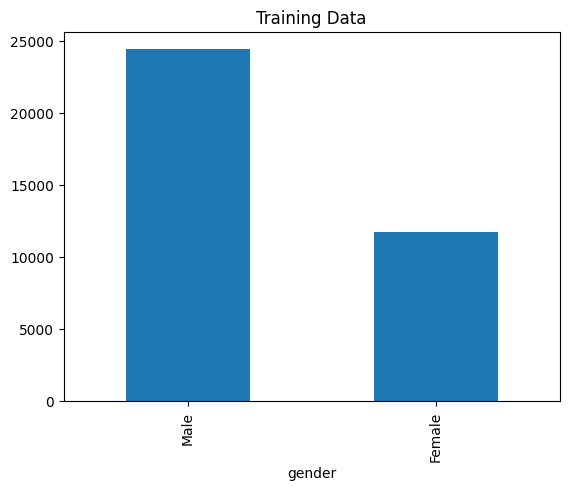

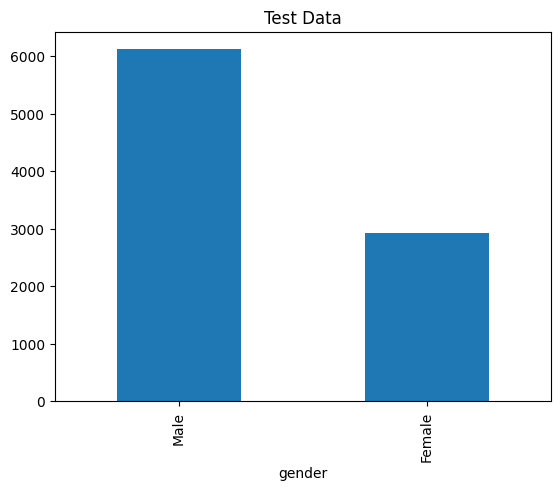

In [30]:
# Extract gender series aligned to train/test splits
gender_train = df.loc[X_train.index, 'gender']   # or 'gender' if that's your column name
gender_test  = df.loc[X_test.index,  'gender']

# Quick sanity check
print("Training genders:", gender_train.value_counts().to_dict())
print("  Test   genders:", gender_test.value_counts().to_dict())

gender_train.value_counts().plot(kind="bar", title='Training Data')
plt.show()

gender_test.value_counts().plot(kind='bar', title='Test Data')
plt.show()

### Step 1: Install & Import Fairlearn

We’ll use `ExponentiatedGradient` with `EqualizedOdds` to bake fairness into training.


In [69]:
!pip install -q fairlearn

from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Prepare Sensitive Features DataFrames

Extract **gender** and **race** for your train/test splits so Fairlearn can enforce fairness across both.


In [70]:
# 1) isolate just gender
gender_train = df.loc[X_train.index, 'gender']
gender_test  = df.loc[X_test.index,  'gender']

# Quick preview
print("Training sensitive features:\n", gender_train.head())
print("\nTest sensitive features:\n",  gender_test.head())


Training sensitive features:
 8605       Male
28547    Female
33927    Female
14437      Male
41839      Male
Name: gender, dtype: object

Test sensitive features:
 21762    Female
21701      Male
42663      Male
42694      Male
13590      Male
Name: gender, dtype: object


### Step 3: Train a Fairness‐Aware Model

Wrap a `LogisticRegression` in `ExponentiatedGradient` to enforce Equalized Odds.


In [71]:

# 2) define base estimator
base_est = LogisticRegression(max_iter=1000, random_state=42)

# 3) wrap in ExponentiatedGradient with EqualizedOdds on gender
mitigator = ExponentiatedGradient(
    estimator=base_est,
    constraints=EqualizedOdds(),
    eps=0.01              # tolerance for EO across gender groups
)

# 4) fit on training data + gender
mitigator.fit(
    X_train,
    y_train,
    sensitive_features=gender_train
)


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x1273ba450>,
                      estimator=LogisticRegression(max_iter=1000,
                                                   random_state=42),
                      nu=np.float64(0.0009425360631320293))

### Step 4: Evaluate Model

Check overall accuracy, classification report, then confirm TPR/FPR parity across (gender, race).


Fair (gender-only) model accuracy: 0.8401326699834163
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6842
           1       0.72      0.56      0.63      2203

    accuracy                           0.84      9045
   macro avg       0.79      0.75      0.76      9045
weighted avg       0.83      0.84      0.83      9045


Equalized Odds metrics by gender:
             TPR       FPR
gender                    
Female  0.576577  0.063707
Male    0.559893  0.074553


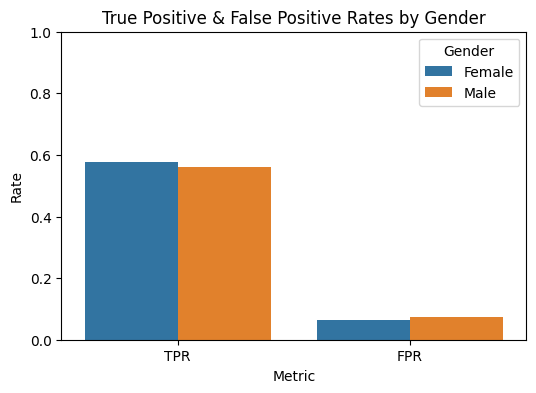

In [72]:

# 5) predict & evaluate
y_pred_fair = mitigator.predict(X_test)
print("Fair (gender-only) model accuracy:", accuracy_score(y_test, y_pred_fair))
print(classification_report(y_test, y_pred_fair))

# 6) compute TPR & FPR by gender
metric_frame = MetricFrame(
    metrics={'TPR': true_positive_rate, 'FPR': false_positive_rate},
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=gender_test
)
print("\nEqualized Odds metrics by gender:")
print(metric_frame.by_group)


### Step 5: Visualize TPR & FPR

Plot side‐by‐side bar charts to confirm the disparities have been reduced.


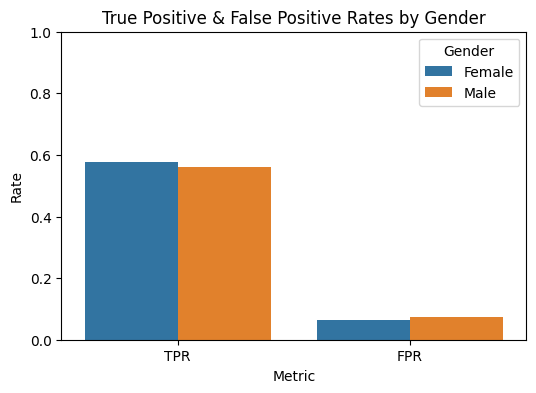

In [73]:

# 7) plot gender bars (no error bars)
gender_long = metric_frame.by_group.reset_index().melt(
    id_vars='gender',
    value_vars=['TPR','FPR'],
    var_name='Metric',
    value_name='Rate'
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=gender_long,
    x='Metric',
    y='Rate',
    hue='gender',
    errorbar=None
)
plt.ylim(0,1)
plt.title("True Positive & False Positive Rates by Gender")
plt.ylabel("Rate")
plt.legend(title='Gender')
plt.show()

In [75]:
# Assuming `gender_summary` is your 1-row DataFrame from evaluate_equalized_odds
summary_table = pd.DataFrame({
    'attr': ['Gap', 'Ratio'],
    'TPR': [gender_summary.at[0, 'TPR_gap'],
            gender_summary.at[0, 'TPR_ratio']],
    'FPR': [gender_summary.at[0, 'FPR_gap'],
            gender_summary.at[0, 'FPR_ratio']]
})

# Display it nicely in Jupyter
summary_table.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])


,attr,TPR,FPR
0,Gap,0.016684,0.010847
1,Ratio,0.971065,0.854512


### Step 6: Save Your Production‐Ready Model

Serialize the fairness‐aware model for deployment, just like any other sklearn estimator.
```
joblib.dump(mitigator, 'fair_prod_model_multigroup.joblib')
print("✅ Model saved → fair_prod_model_multigroup.joblib")
```

In [80]:
# # # ─── FAIRNESS VISUALIZATION BY GENDER & RACE ──────────────────────────
# import pandas as pd

# def evaluate_equalized_odds(rates_df, attr_name):
#     """
#     Given a DataFrame with ['group','TPR','FPR'], compute:
#       - max/min TPR & FPR
#       - absolute gap (max - min)
#       - ratio (min / max) for four-fifths test
#       - boolean flags for both checks
#     Returns a single-row summary DataFrame.
#     """
#     # Compute max/min & derived metrics
#     tpr_max, tpr_min = rates_df['TPR'].max(), rates_df['TPR'].min()
#     fpr_max, fpr_min = rates_df['FPR'].max(), rates_df['FPR'].min()
#     tpr_gap   = tpr_max - tpr_min
#     fpr_gap   = fpr_max - fpr_min
#     tpr_ratio = (tpr_min / tpr_max) if tpr_max > 0 else float('nan')
#     fpr_ratio = (fpr_min / fpr_max) if fpr_max > 0 else float('nan')
    
#     # Rule-of-thumb flags
#     tpr_flag_gap   = tpr_gap > 0.10
#     tpr_flag_ratio = tpr_ratio < 0.80
#     fpr_flag_gap   = fpr_gap > 0.10
#     fpr_flag_ratio = fpr_ratio < 0.80
    
#     summary = {
#         'Attribute':           attr_name,
#         'TPR_max':             tpr_max,
#         'TPR_min':             tpr_min,
#         'TPR_gap':             tpr_gap,
#         'TPR_ratio':           tpr_ratio,
#         'TPR_violation_gap':    '❌' if tpr_flag_gap else '✅',
#         'TPR_violation_ratio':  '❌' if tpr_flag_ratio else '✅',
        
#         'FPR_max':             fpr_max,
#         'FPR_min':             fpr_min,
#         'FPR_gap':             fpr_gap,
#         'FPR_ratio':           fpr_ratio,
#         'FPR_violation_gap':    '❌' if fpr_flag_gap else '✅',
#         'FPR_violation_ratio':  '❌' if fpr_flag_ratio else '✅',
#     }
    
#     return pd.DataFrame([summary])


# # Usage example (after computing gender_rates & race_rates):
# gender_summary = evaluate_equalized_odds(gender_rates, "Gender")
# race_summary   = evaluate_equalized_odds(race_rates,   "Race")

# # Combine and display
# fairness_summary = pd.concat([gender_summary, race_summary], ignore_index=True)
# fairness_summary.style.format({
#     'TPR_max':'{:.2f}', 'TPR_min':'{:.2f}', 'TPR_gap':'{:.2f}', 'TPR_ratio':'{:.2f}',
#     'FPR_max':'{:.2f}', 'FPR_min':'{:.2f}', 'FPR_gap':'{:.2f}', 'FPR_ratio':'{:.2f}',
# })



In [81]:
# # ─── 2. DISPARITY METRICS ──────────────────────────────────

# # Prepare a DataFrame to collect metrics
# fairness_df = []

# for group_name, group_series in [('Male', sex_test), ('Female', sex_test)]:
#     mask = (sex_test == group_name)
#     y_t, y_p = y_test[mask], y_pred[mask]
#     fairness_df.append({
#         'group': group_name,
#         'type': 'gender',
#         'accuracy': accuracy_score(y_t, y_p),
#         'recall': recall_score(y_t, y_p, pos_label=1)
#     })

# for race in sorted(race_test.unique()):
#     mask = (race_test == race)
#     y_t, y_p = y_test[mask], y_pred[mask]
#     fairness_df.append({
#         'group': race,
#         'type': 'race',
#         'accuracy': accuracy_score(y_t, y_p),
#         'recall': recall_score(y_t, y_p, pos_label=1)
#     })

# fair_df = pd.DataFrame(fairness_df)


# # Compute differences (male - female) and (max recall - min recall) for race
# gender_metrics = fair_df[fair_df['type']=='gender'].set_index('group')
# gender_gap = gender_metrics.loc['Male','recall'] - gender_metrics.loc['Female','recall']

# race_metrics = fair_df[fair_df['type']=='race'].set_index('group')
# race_gap = race_metrics['recall'].max() - race_metrics['recall'].min()

# print(f"Recall gap (Male vs Female): {gender_gap:.3f}")
# print(f"Recall gap (across races):   {race_gap:.3f}")
# # Important to note: A gap > 0.1 often indicates a concerning disparity.

### Step 4: Learn fair thresholds

ThresholdOptimizer will find per-group probability thresholds that enforce *equalized odds*.


In [82]:
# # Wrap in ThresholdOptimizer (equalized_odds or equal_opportunity)
# opt = ThresholdOptimizer(
#     estimator=model,
#     # constraints="equalized_odds",
#     constraints="true_positive_rate_parity",
#     predict_method="predict_proba",
#     prefit=True
# )

# # Fit on train data + sensitive feature
# opt.fit(X_train, y_train, sensitive_features=gender_train)

# # Produce fair predictions on test set
# y_pred_fair = opt.predict(X_test, sensitive_features=gender_test)

### Evaluate performance & fairness

Compare accuracy + classification report, then recompute TPR/FPR by group.

In [83]:
# # Overall metrics
# print("Fair model accuracy:", accuracy_score(y_test, y_pred_fair))
# print(classification_report(y_test, y_pred_fair))

# def compute_group_rates(y_true, y_pred, groups):
#     records = []
#     for g in groups.unique():
#         mask = (groups == g)
#         tn, fp, fn, tp = confusion_matrix(
#             y_true[mask], y_pred[mask], labels=[0,1]
#         ).ravel()
#         tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
#         fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
#         records.append({'group': g, 'TPR': tpr, 'FPR': fpr})
#     return pd.DataFrame(records)

# # Re‐compute per‐group TPR/FPR (reuse your compute_group_rates function)
# gender_rates_fair = compute_group_rates(
#     y_test,
#     y_pred=pd.Series(y_pred_fair, index=y_test.index).astype(int),
#     groups=gender_test
# )
# print("\nPost-processing TPR/FPR by gender:\n", gender_rates_fair)

# # (Optional) Visualize like before:
# gender_long_fair = gender_rates_fair.melt(id_vars='group', var_name='Metric', value_name='Rate')
# sns.barplot(data=gender_long_fair, x='Metric', y='Rate', hue='group')
# plt.title("Fair TPR & FPR by Gender (Equalized Odds)")
# plt.ylim(0,1)
# plt.show()


### Maybe an interesting exercise!

- Change `constraints="equalized_odds"` to `constraints="true_positive_rate_parity"`. (this is the same as `equal_opportunity`)  
- Re-run the ThresholdOptimizer and compare the new TPR/FPR by group.  
- Which groups trade off FPR improvements vs TPR changes?

In [84]:
# # ─── Fairness Post‐Processing for Gender & Race ─────────────────────────────────

# from fairlearn.postprocessing import ThresholdOptimizer
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Loop over sensitive attributes
# for attr in ['gender', 'race']:
#     # print(f"\n===== Processing Equalized Odds for '{attr}' =====")
    
#     # 1) Extract sensitive feature aligned to train/test
#     sens_train = df.loc[X_train.index, attr]
#     sens_test  = df.loc[X_test.index,  attr]
    
#     # Sanity check counts
#     # print(f"Training {attr} distribution:\n", sens_train.value_counts(), "\n")
#     # print(f"  Test   {attr} distribution:\n", sens_test.value_counts(), "\n")
    
#     # 2) Wrap your already‐trained model in a ThresholdOptimizer
#     opt = ThresholdOptimizer(
#         estimator=model,                # your base model
#         constraints="equalized_odds",
#         predict_method="predict_proba",
#         prefit=True
#     )
    
#     # 3) Fit the optimizer on train + sensitive feature
#     opt.fit(X_train, y_train, sensitive_features=sens_train)
    
#     # 4) Predict “fair” labels on test set
#     y_pred_fair = opt.predict(X_test, sensitive_features=sens_test)
    
#     # 5) Overall performance
#     # print("Fair model accuracy:", accuracy_score(y_test, y_pred_fair))
#     # print(classification_report(y_test, y_pred_fair))
    
#     # 6) Compute per‐group TPR/FPR (reuse your compute_group_rates function)
#     rates_fair = compute_group_rates(
#         y_true=y_test,
#         y_pred=pd.Series(y_pred_fair, index=y_test.index).astype(int),
#         groups=sens_test
#     )
#     # print(f"\nPost‐processing TPR/FPR by {attr}:\n", rates_fair, "\n")
    
#     # 7) Visualize TPR & FPR side-by-side
#     long_df = rates_fair.melt(
#         id_vars='group', var_name='Metric', value_name='Rate'
#     )
#     plt.figure(figsize=(6,4))
#     sns.barplot(data=long_df, x='Metric', y='Rate', hue='group')
#     plt.ylim(0,1)
#     plt.title(f"Fair TPR & FPR by {attr.title()} (Equalized Odds)")
#     plt.legend(title=attr.title(), bbox_to_anchor=(1,1))
#     plt.tight_layout()
#     plt.show()


# Race Only Fairness

Fair (race-only) model accuracy: 0.8491984521835269
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.59      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045


Equalized Odds metrics by race:
                         TPR       FPR
race                                  
Amer-Indian-Eskimo  0.555556  0.023256
Asian-Pac-Islander  0.602941  0.123529
Black               0.631579  0.084011
Other               0.888889  0.070423
White               0.585559  0.063874


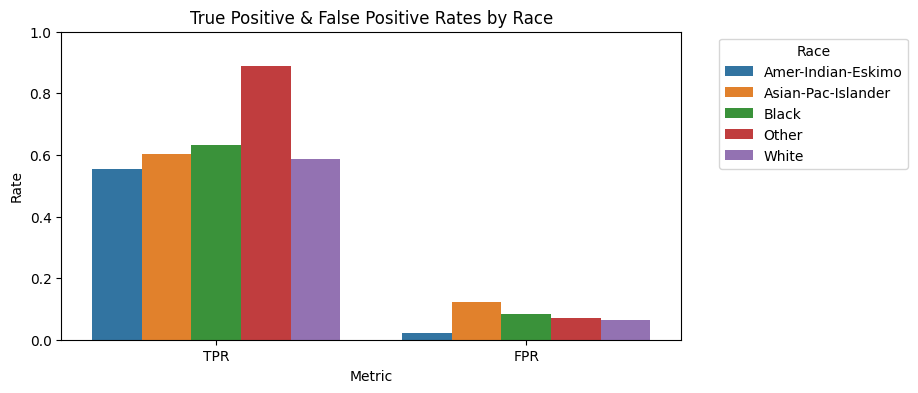

In [85]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate
import matplotlib.pyplot as plt
import seaborn as sns

# 1) isolate just race
race_train = df.loc[X_train.index, 'race']
race_test  = df.loc[X_test.index,  'race']

# 2) define base estimator
base_est = LogisticRegression(max_iter=1000, random_state=42)

# 3) wrap in ExponentiatedGradient with EqualizedOdds on race
mitigator = ExponentiatedGradient(
    estimator=base_est,
    constraints=EqualizedOdds(),
    eps=0.01              # tolerance for EO across race groups
)

# 4) fit on training data + race
mitigator.fit(
    X_train,
    y_train,
    sensitive_features=race_train
)

# 5) predict & evaluate
y_pred_fair = mitigator.predict(X_test)
print("Fair (race-only) model accuracy:", accuracy_score(y_test, y_pred_fair))
print(classification_report(y_test, y_pred_fair))

# 6) compute TPR & FPR by race
metric_frame = MetricFrame(
    metrics={'TPR': true_positive_rate, 'FPR': false_positive_rate},
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=race_test
)
print("\nEqualized Odds metrics by race:")
print(metric_frame.by_group)

# 7) plot just race bars (no error bars)
race_long = metric_frame.by_group.reset_index().melt(
    id_vars='race',
    value_vars=['TPR','FPR'],
    var_name='Metric',
    value_name='Rate'
)

plt.figure(figsize=(8,4))
sns.barplot(
    data=race_long,
    x='Metric',
    y='Rate',
    hue='race',
    errorbar=None
)
plt.ylim(0,1)
plt.title("True Positive & False Positive Rates by Race")
plt.ylabel("Rate")
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [86]:
!pip install aif360

In [91]:
# # pip install aif360
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# from aif360.datasets import BinaryLabelDataset
# from aif360.algorithms.inprocessing import GridSearchReduction

# # ─── 0) assume X_train, X_test, y_train, y_test, df are defined ───────────────

# # 1) Build a composite sensitive attribute and factorize to ints
# gender_train = df.loc[X_train.index, 'gender'].astype(str)
# race_train   = df.loc[X_train.index, 'race'].astype(str)
# gender_test  = df.loc[X_test.index,  'gender'].astype(str)
# race_test    = df.loc[X_test.index,  'race'].astype(str)

# train_comp = (gender_train + "_" + race_train).rename("gender_race")
# test_comp  = (gender_test  + "_" + race_test).rename("gender_race")

# # factorize to 0…n_composite−1
# train_comp_codes = pd.Categorical(train_comp).codes
# test_comp_codes  = pd.Categorical(test_comp, categories=pd.Categorical(train_comp).categories).codes

# # 2) build AIF360 BinaryLabelDatasets
# train_df = X_train.copy()
# train_df['label']        = y_train
# train_df['gender_race']  = train_comp_codes

# test_df  = X_test.copy()
# test_df['label']        = y_test
# test_df['gender_race']  = test_comp_codes

# train_bld = BinaryLabelDataset(
#     df=train_df,
#     label_name='label',
#     favorable_label=1,
#     unfavorable_label=0,
#     protected_attribute_names=['gender_race']
# )

# test_bld = BinaryLabelDataset(
#     df=test_df,
#     label_name='label',
#     favorable_label=1,
#     unfavorable_label=0,
#     protected_attribute_names=['gender_race']
# )

# # 3) set up and run GridSearchReduction for Equalized Odds
# mitigator = GridSearchReduction(
#     unmitigated_classifier=LogisticRegression(max_iter=1000, random_state=42),
#     constraints="equalized_odds",
#     grid_size=20   # increase for finer search (but slower)
# )
# mitigator = mitigator.fit(train_bld)

# # 4) apply to test and get pandas‐style predictions
# pred_bld = mitigator.predict(test_bld)
# y_pred_fair = pred_bld.labels.ravel()

# print("Overall accuracy (fair):", accuracy_score(y_test, y_pred_fair))
# print(classification_report(y_test, y_pred_fair))

# # 5) helper to compute TPR & FPR by group
# def compute_group_rates(y_true, y_pred, groups):
#     df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'group': groups})
#     def rates(g):
#         tp = ((g.y_true==1)&(g.y_pred==1)).sum()
#         fn = ((g.y_true==1)&(g.y_pred==0)).sum()
#         fp = ((g.y_true==0)&(g.y_pred==1)).sum()
#         tn = ((g.y_true==0)&(g.y_pred==0)).sum()
#         return pd.Series({
#             'TPR': tp/(tp+fn) if (tp+fn)>0 else np.nan,
#             'FPR': fp/(fp+tn) if (fp+tn)>0 else np.nan
#         })
#     return df.groupby('group').apply(rates)

# # 6) compute intersectional rates
# int_rates = compute_group_rates(y_test, y_pred_fair, test_comp)

# # 7) compute marginal by gender and by race
# #    map composite codes back to strings
# comp_cats = pd.Categorical(train_comp).categories
# int_labels = comp_cats[test_comp_codes]

# gender_rates = compute_group_rates(
#     y_test, y_pred_fair,
#     groups=pd.Categorical(int_labels).str.split('_').str[0]
# )
# race_rates = compute_group_rates(
#     y_test, y_pred_fair,
#     groups=pd.Categorical(int_labels).str.split('_').str[1]
# )

# # 8) Plotting function
# def plot_rates(rates_df, attr_name, figsize, legend_args):
#     long = rates_df.reset_index().melt(
#         id_vars='group',
#         value_vars=['TPR','FPR'],
#         var_name='Metric',
#         value_name='Rate'
#     )
#     plt.figure(figsize=figsize)
#     sns.barplot(data=long, x='Metric', y='Rate',
#                 hue='group', errorbar=None)
#     plt.ylim(0,1)
#     plt.title(f"True Positive & False Positive Rates by {attr_name}")
#     plt.ylabel("Rate")
#     plt.legend(title=attr_name, **legend_args)
#     plt.show()

# # 9) draw gender plot
# plot_rates(gender_rates, "Gender",
#            figsize=(6,4),
#            legend_args={})

# # 10) draw race plot
# plot_rates(race_rates, "Race",
#            figsize=(8,4),
#            legend_args={'bbox_to_anchor':(1.05,1), 'loc':'upper left'})


In [92]:
# # pip install aif360
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# from aif360.datasets import BinaryLabelDataset
# from aif360.algorithms.inprocessing import GridSearchReduction

# # ─── 0) assume X_train, X_test, y_train, y_test, df are already defined ────────

# # ─── 1) Build composite sensitive attribute & factorize ────────────────────────
# gender_train = df.loc[X_train.index, 'gender'].astype(str)
# race_train   = df.loc[X_train.index, 'race'].astype(str)
# gender_test  = df.loc[X_test.index,  'gender'].astype(str)
# race_test    = df.loc[X_test.index,  'race'].astype(str)

# train_comp = (gender_train + "_" + race_train).rename("gender_race")
# test_comp  = (gender_test  + "_" + race_test).rename("gender_race")

# # Factorize to integers (required by AIF360)
# cat = pd.Categorical(train_comp)
# train_comp_codes = cat.codes
# test_comp_codes  = pd.Categorical(test_comp, categories=cat.categories).codes

# # ─── 2) Wrap into AIF360’s BinaryLabelDataset ────────────────────────────────
# train_df = X_train.copy()
# train_df['label']        = y_train
# train_df['gender_race']  = train_comp_codes

# test_df = X_test.copy()
# test_df['label']        = y_test
# test_df['gender_race']  = test_comp_codes

# train_bld = BinaryLabelDataset(
#     df=train_df,
#     label_names=['label'],                   # <— note label_names (list)
#     protected_attribute_names=['gender_race'],
#     favorable_label=1,
#     unfavorable_label=0
# )

# test_bld = BinaryLabelDataset(
#     df=test_df,
#     label_names=['label'],
#     protected_attribute_names=['gender_race'],
#     favorable_label=1,
#     unfavorable_label=0
# )

# # ─── 3) Fit GridSearchReduction for Equalized Odds ────────────────────────────
# mitigator = GridSearchReduction(
#     unmitigated_classifier=LogisticRegression(max_iter=1000, random_state=42),
#     constraints="equalized_odds",
#     grid_size=20   # larger ⇒ finer—but slower
# )
# mitigator = mitigator.fit(train_bld)

# pred_bld    = mitigator.predict(test_bld)
# y_pred_fair = pred_bld.labels.ravel()

# print("Overall accuracy (fair):", accuracy_score(y_test, y_pred_fair))
# print(classification_report(y_test, y_pred_fair))

# # ─── 4) Utility to compute TPR & FPR by group ─────────────────────────────────
# def compute_group_rates(y_true, y_pred, groups):
#     df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'group': groups})
#     def rates(g):
#         tp = ((g.y_true==1)&(g.y_pred==1)).sum()
#         fn = ((g.y_true==1)&(g.y_pred==0)).sum()
#         fp = ((g.y_true==0)&(g.y_pred==1)).sum()
#         tn = ((g.y_true==0)&(g.y_pred==0)).sum()
#         return pd.Series({
#             'TPR': tp/(tp+fn) if (tp+fn)>0 else np.nan,
#             'FPR': fp/(fp+tn) if (fp+tn)>0 else np.nan
#         })
#     return df.groupby('group').apply(rates)

# # 5) Intersectional rates
# int_rates = compute_group_rates(y_test, y_pred_fair, test_comp)

# # 6) Marginal rates by gender & by race
# # map back composite codes to their string labels
# labels = cat.categories[test_comp_codes]
# genders = pd.Series(labels).str.split('_').str[0]
# races   = pd.Series(labels).str.split('_').str[1]

# gender_rates = compute_group_rates(y_test, y_pred_fair, genders)
# race_rates   = compute_group_rates(y_test, y_pred_fair, races)

# # 7) Plot helper
# def plot_rates(rates_df, attr, figsize, legend_args):
#     long = rates_df.reset_index().melt(
#         id_vars='group',
#         value_vars=['TPR','FPR'],
#         var_name='Metric',
#         value_name='Rate'
#     )
#     plt.figure(figsize=figsize)
#     sns.barplot(data=long, x='Metric', y='Rate',
#                 hue='group', errorbar=None)
#     plt.ylim(0,1)
#     plt.title(f"True Positive & False Positive Rates by {attr}")
#     plt.ylabel("Rate")
#     plt.legend(title=attr, **legend_args)
#     plt.show()

# # 8) Draw the two marginal plots
# plot_rates(gender_rates, "Gender", figsize=(6,4), legend_args={})
# plot_rates(race_rates,   "Race",   figsize=(8,4),
#            legend_args={'bbox_to_anchor':(1.05,1), 'loc':'upper left'})
